## **Part I:**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Load the dataset
file_path = '/content/drive/MyDrive/DSA8203 Assignments/DSA 8203 - CAT 1/cars_2024-2.csv'
data = pd.read_csv(file_path)

In [33]:
# Displays the First Few Rows
data.head()

,date_reg,type,maker,model,colour,fuel,state
0,2024-01-01,jip,Chery,Omoda 5,black,petrol,Rakan Niaga
1,2024-01-01,jip,Chery,Omoda 5,white,petrol,Rakan Niaga
2,2024-01-01,jip,Chery,Omoda 5,white,petrol,Rakan Niaga
3,2024-01-01,pick_up,Ford,Ranger,black,petrol,Johor
4,2024-01-01,pick_up,Ford,Ranger,orange,greendiesel,Johor


In [34]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700045 entries, 0 to 700044
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date_reg  700045 non-null  object
 1   type      700045 non-null  object
 2   maker     700045 non-null  object
 3   model     700045 non-null  object
 4   colour    700045 non-null  object
 5   fuel      700045 non-null  object
 6   state     700045 non-null  object
dtypes: object(7)
memory usage: 37.4+ MB


## **1. What cleanup was required in your dataset? How did you handle missing values?**

In [35]:
# Check for missing values
missing_values = data.isnull().sum()

In [51]:
# Define a function to clean data (e.g., handle missing values and duplicates)
def clean_data(raw_data):
    # Example cleanup: fill missing colors with "unknown"
    raw_data['colour'] = raw_data['colour'].fillna('unknown')
    # Remove duplicates
    cleaned_data = raw_data.drop_duplicates()
    return cleaned_data

# Apply the cleaning function
cleaned_data = clean_data(data)

In [52]:
# Verify the cleaned dataset
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130807 entries, 0 to 700027
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date_reg  130807 non-null  object
 1   type      130807 non-null  object
 2   maker     130807 non-null  object
 3   model     130807 non-null  object
 4   colour    130807 non-null  object
 5   fuel      130807 non-null  object
 6   state     130807 non-null  object
dtypes: object(7)
memory usage: 8.0+ MB


## **2. Is there an example of an outlier in your data that surprised you? Why?**

In [39]:
# Check for unusual entries in 'fuel' column
fuel_counts = cleaned_data['fuel'].value_counts()

# Display the least common fuel types
fuel_counts.tail()

,count
fuel,
hybrid_petrol,9000
diesel,2439
petrol_ng,2
hybrid_diesel,2
diesel_ng,1


In [40]:
# Investigate the rows with rare fuel types
rare_fuel_types = ['petrol_ng', 'hybrid_diesel', 'diesel_ng']
rare_fuel_data = cleaned_data[cleaned_data['fuel'].isin(rare_fuel_types)]

# Display the outliers
rare_fuel_data

,date_reg,type,maker,model,colour,fuel,state
64952,2024-01-31,motokar,Perodua,Bezza,white,petrol_ng,Rakan Niaga
279063,2024-05-07,motokar,Mercedes Benz,A-Class,white,petrol_ng,Rakan Niaga
474517,2024-07-30,jip,Toyota,Fortuner,black,diesel_ng,Sabah
494868,2024-08-09,jip,Mazda,CX-60,gold,hybrid_diesel,Rakan Niaga
612240,2024-09-28,jip,Toyota,Corolla Cross,white,hybrid_diesel,Rakan Niaga


## **3. Look at some histograms for your data. How would you explain one of them?**

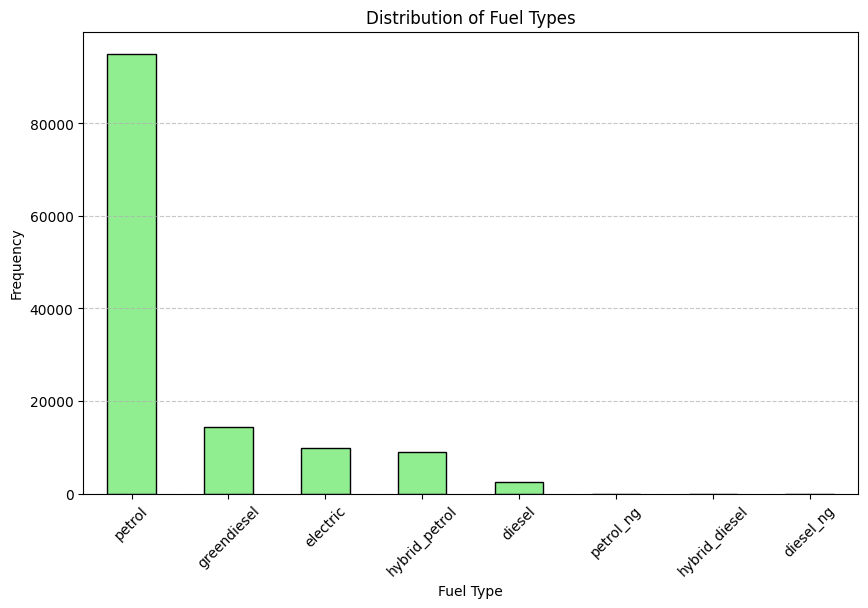

In [53]:
# Plot a histogram for the 'fuel' column
plt.figure(figsize=(10, 6))
cleaned_data['fuel'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

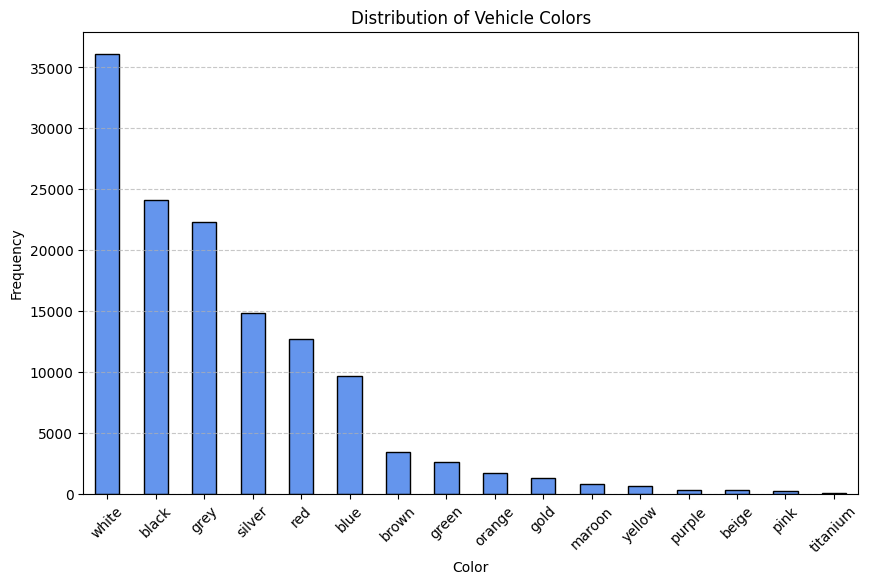

In [44]:
# Plot a histogram for the 'colour' column
plt.figure(figsize=(10, 6))
cleaned_data['colour'].value_counts().plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Distribution of Vehicle Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

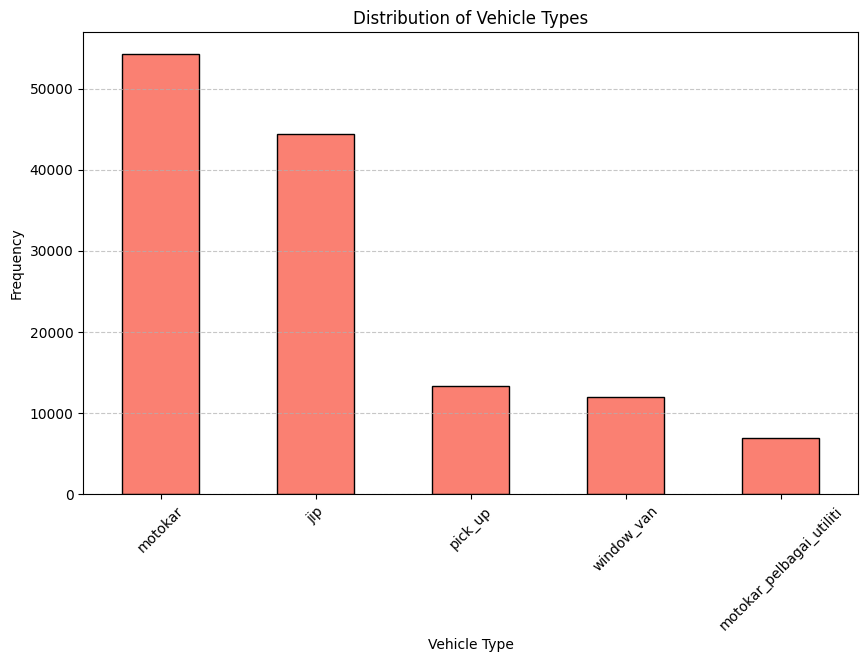

In [45]:
# Plot a histogram for the 'type' column
plt.figure(figsize=(10, 6))
cleaned_data['type'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **4. Is there a relationship between two columns of your data that you didn't expect? How would you explain it?**

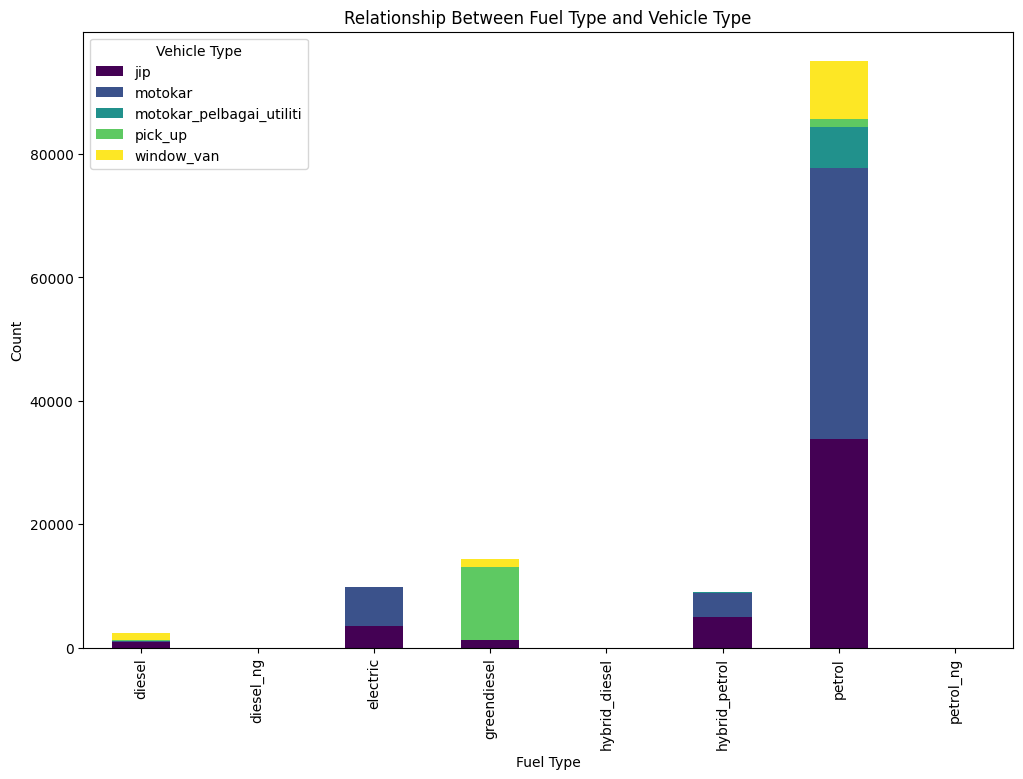

In [46]:
# Create a crosstab to see the relationship between 'fuel' and 'type'
fuel_type_crosstab = pd.crosstab(cleaned_data['fuel'], cleaned_data['type'])

# Visualize the crosstab
fuel_type_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Relationship Between Fuel Type and Vehicle Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.legend(title='Vehicle Type')
plt.show()

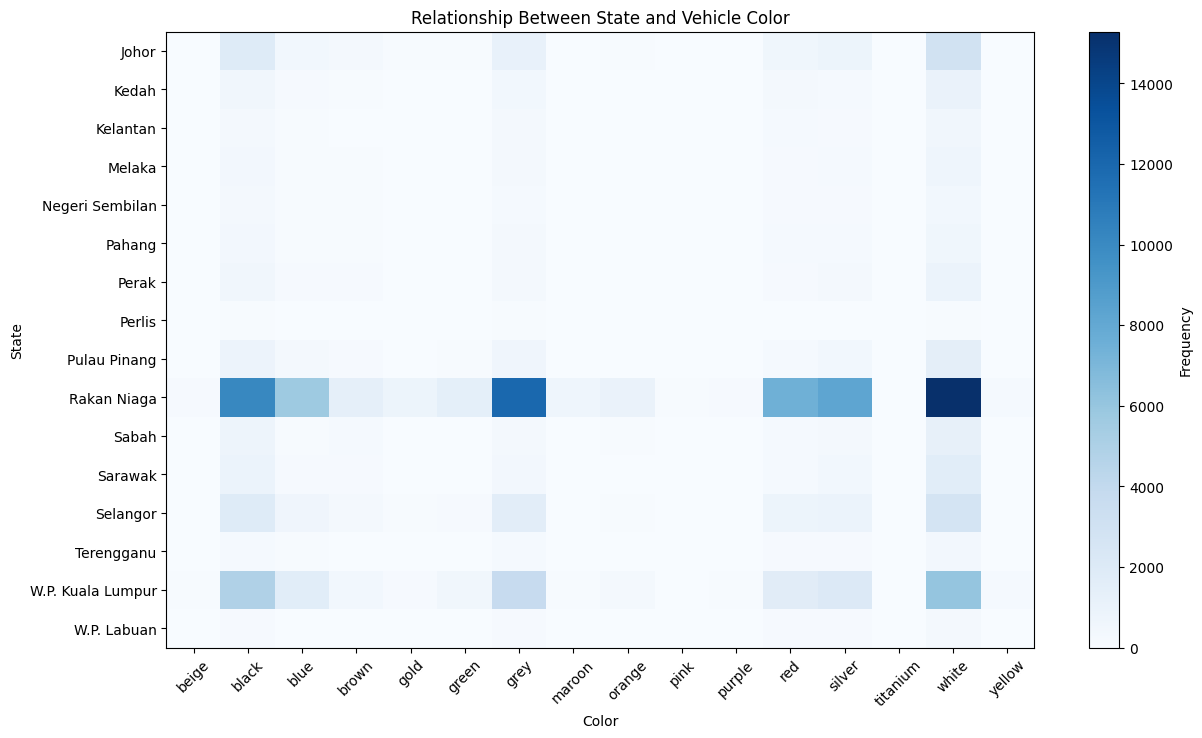

In [48]:
# Create a crosstab to examine the relationship between 'state' and 'colour'
state_colour_crosstab = pd.crosstab(cleaned_data['state'], cleaned_data['colour'])

# Visualize the relationship with a heatmap
plt.figure(figsize=(14, 8))
plt.imshow(state_colour_crosstab, aspect='auto', cmap='Blues', interpolation='nearest')
plt.colorbar(label='Frequency')
plt.title('Relationship Between State and Vehicle Color')
plt.xlabel('Color')
plt.ylabel('State')
plt.xticks(range(len(state_colour_crosstab.columns)), state_colour_crosstab.columns, rotation=45)
plt.yticks(range(len(state_colour_crosstab.index)), state_colour_crosstab.index)
plt.show()


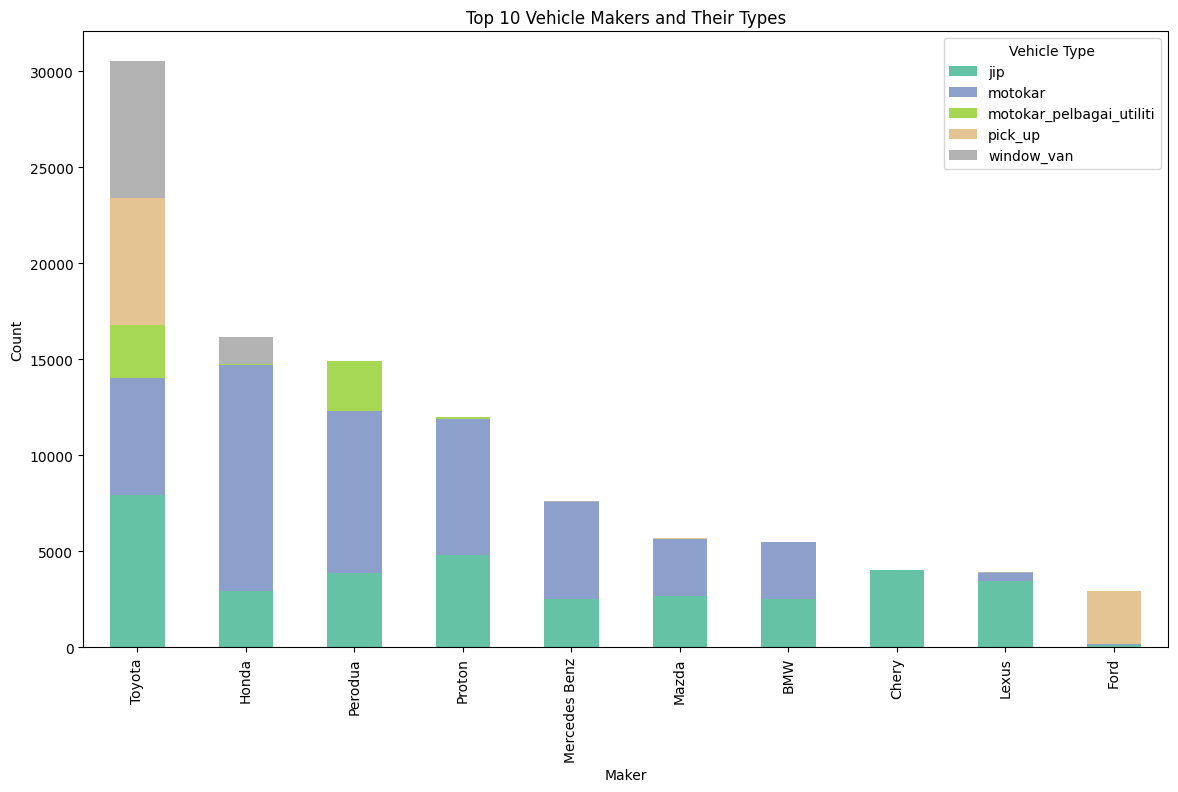

In [49]:
# Create a crosstab to examine the relationship between 'maker' and 'type'
maker_type_crosstab = pd.crosstab(cleaned_data['maker'], cleaned_data['type'])

# Visualize the relationship with a stacked bar plot for the top 10 makers
top_makers = maker_type_crosstab.sum(axis=1).sort_values(ascending=False).head(10).index
maker_type_crosstab.loc[top_makers].plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Top 10 Vehicle Makers and Their Types')
plt.xlabel('Maker')
plt.ylabel('Count')
plt.legend(title='Vehicle Type')
plt.show()

## **5. Bonus: What’s one question you would have asked that is not included, and how would you answer it?**

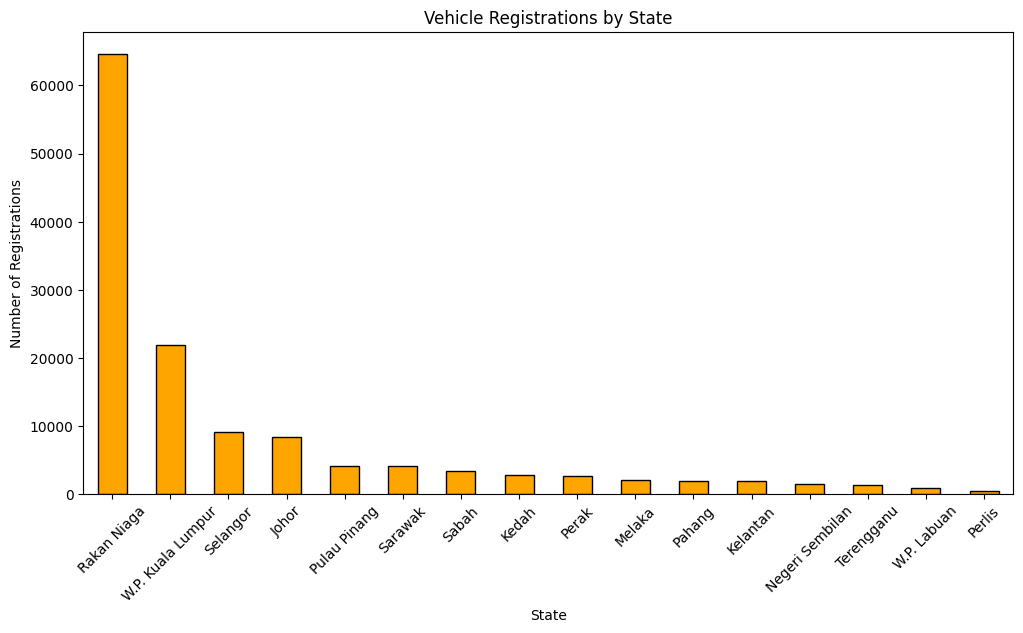

In [50]:
# Group by state and count registrations
state_counts = cleaned_data['state'].value_counts()

# Plot the counts
state_counts.plot(kind='bar', figsize=(12, 6), color='orange', edgecolor='black')
plt.title('Vehicle Registrations by State')
plt.xlabel('State')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.show()

## **6. Who would be interested in your dataset? Identify three organizations or individuals and why.**

Government Agencies - For tracking fuel trends and policymaking.

Automotive Companies - To understand market preferences

Environmental Researchers - To study the prevalence of eco-friendly vehicles.


## **PART II:**

Watch the video on  [Discussion Analytics to AI](https://www.youtube.com/watch?v=gZk9wJv4yCU).

In two to three sentences (include them in your Colab notebook) highlight your biggest take away from the video.


*My key takeaway from the speaker's message is that while tools for analytics and AI continue to advance professionally, the core business objectives have remained constant, success depends on clearly defining what to optimize or maximize, then aligning AI solutions with these goals and organizational values.*